Total number of all reviewers: 242
Total number of all reviews: 6065


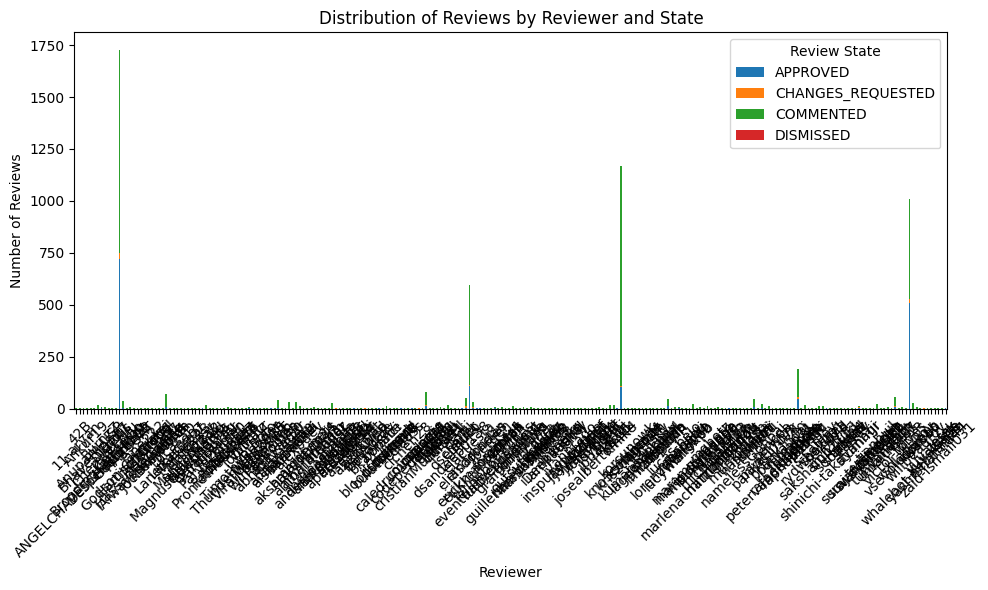

In [ ]:
# NUMBER OF REVIEWS THROUGH OUT THE PROJECT HISTORY

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'scrapy_reviews.csv'
data = pd.read_csv(file_path)

# Calculate the number of unique reviewers
num_reviewers = data['Reviewer'].nunique()
print(f"Total number of all reviewers: {num_reviewers}")

# Calculate the total number of reviews (count the number of rows)
num_reviews = len(data)
print(f"Total number of all reviews: {num_reviews}")

# Group by reviewer and review state, then count the occurences
all_reviewer_state = data.groupby(['Reviewer', 'State']).size().unstack(fill_value=0)

# Plot the distribution of all reviewer and state
all_reviewer_state.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Reviewer and State')
plt.legend(title='Review State')
plt.xticks(rotation=45)

# Show the Plot the distribution of all reviewer and state
plt.tight_layout()
plt.show()



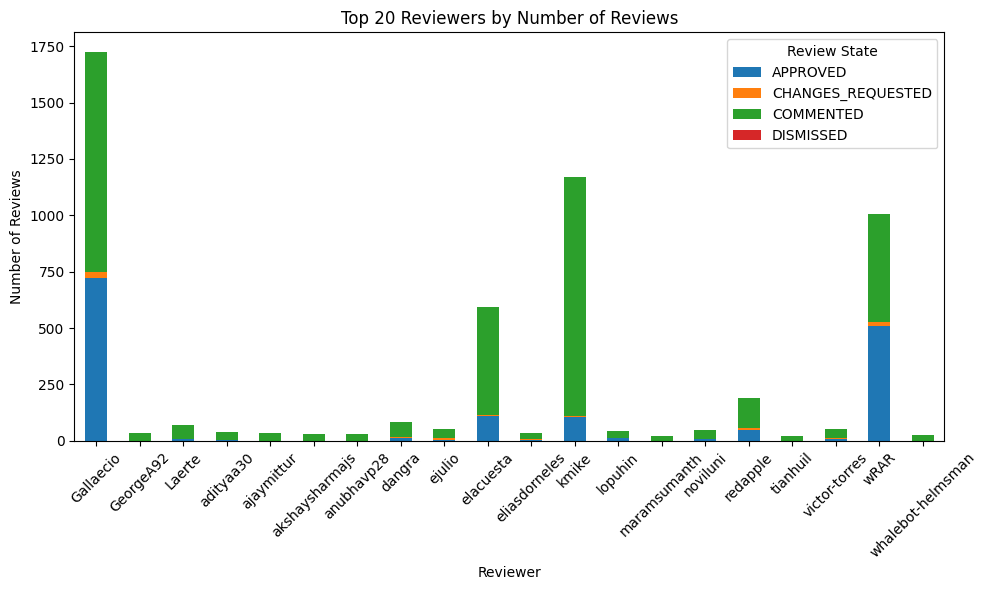

In [ ]:
# TOP 20 REVIEWERS WITH HIGHEST REVIEWS COUNT THROUGH OUT THE PROJECT HISTORY
# WITH ADDITIONAL INFORMATION ABOUT STATE

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'scrapy_reviews.csv'
data = pd.read_csv(file_path)

# Calculate total reviews per reviewer
total_reviews = data.groupby('Reviewer').size()

# Get the top 20 reviewers
top_20_reviewers = total_reviews.nlargest(20)

# Filter data for the top 20 reviewers
filtered_data = data[data['Reviewer'].isin(top_20_reviewers.index)]

# Calculate total reviews per state
total_state = data.groupby('State').size()

# Group by reviewer and review state, then count the occurences
review_distribution = filtered_data.groupby(['Reviewer', 'State']).size().unstack(fill_value=0)

# Plot the distribution
review_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 20 Reviewers by Number of Reviews')
plt.xlabel('Reviewer')
plt.ylabel('Number of Reviews')
plt.legend(title='Review State')
plt.xticks(rotation=45)

#Show the Plot
plt.tight_layout()
plt.show()

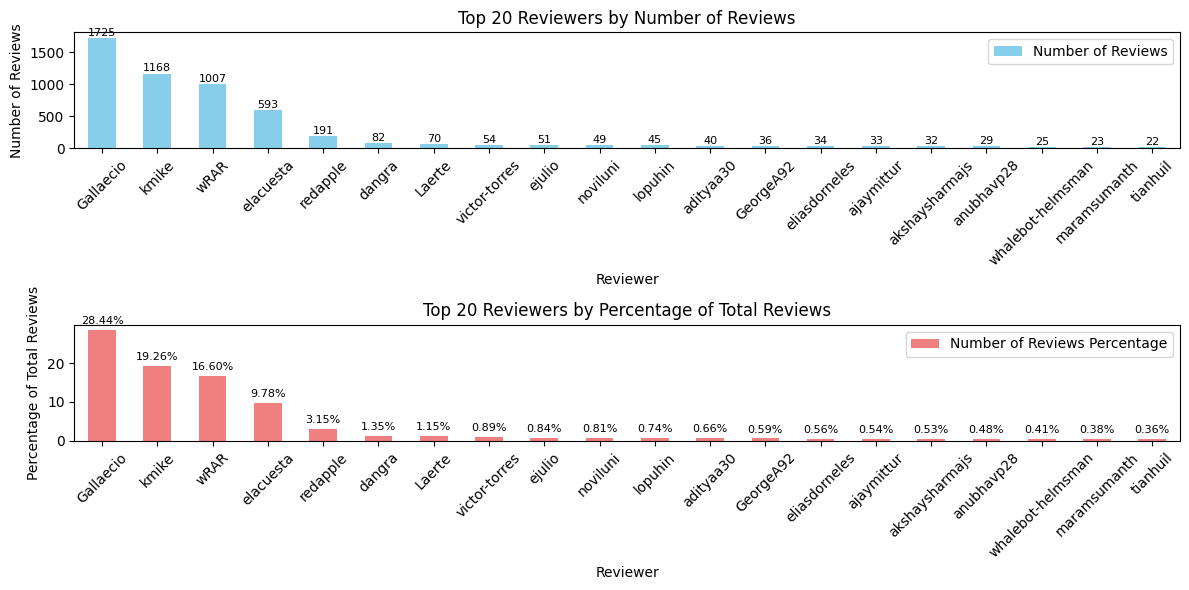

In [ ]:
# TOP 20 REVIEWERS WITH HIGHEST REVIEWS COUNT THROUGH OUT THE PROJECT HISTORY
# AND ITS PERCENTAGE OF ALL TOTAL NUMBER REVIEWS

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'scrapy_reviews.csv'
data = pd.read_csv(file_path)

# Calculate total reviews per reviewer
total_reviews = data.groupby('Reviewer').size()

# Get the top 20 reviewers
top_20_reviewers = total_reviews.nlargest(20)

# Calculate the percentage of reviews by each top 20 reviewer
top_20_percentage = (top_20_reviewers / total_reviews.sum() ) * 100


# Combine into a DataFrame
top20reviewers_df = pd.DataFrame ({'Number of Reviews': top_20_reviewers}).sort_values(by='Number of Reviews', ascending=False)
top20percentage_df = pd.DataFrame ({'Number of Reviews Percentage': top_20_percentage}).sort_values(by='Number of Reviews Percentage', ascending=False)

# Create subplots
fig, axes = plt.subplots(2,1, figsize=(12, 6))

# Plot 1: Total Reviews
top20reviewers_df.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 20 Reviewers by Number of Reviews')
axes[0].set_xlabel('Reviewer')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Annotate each bar
for i, value in enumerate(top20reviewers_df['Number of Reviews']):
    axes[0].text(
        i,  # x-coordinate
        value + 0.5,  # y-coordinate (slightly above the bar)
        f'{value}',  # formatted value
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=8  # font size
    )

# Plot 2: Percentage of Total Reviews
top20percentage_df.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Top 20 Reviewers by Percentage of Total Reviews')
axes[1].set_xlabel('Reviewer')
axes[1].set_ylabel('Percentage of Total Reviews')
axes[1].tick_params(axis='x', rotation=45)

# Annotate each bar with the percentage value
for i, value in enumerate(top20percentage_df['Number of Reviews Percentage']):
    axes[1].text(
        i,  # x-coordinate
        (value + 1),  # y-coordinate (slightly above the bar)
        f'{value:.2f}%',  # formatted value
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=8  # font size
    )

# Show the plots
plt.tight_layout()
plt.show()



Number of unique committers in 2024: 28
Total number of reviews in 2024: 496


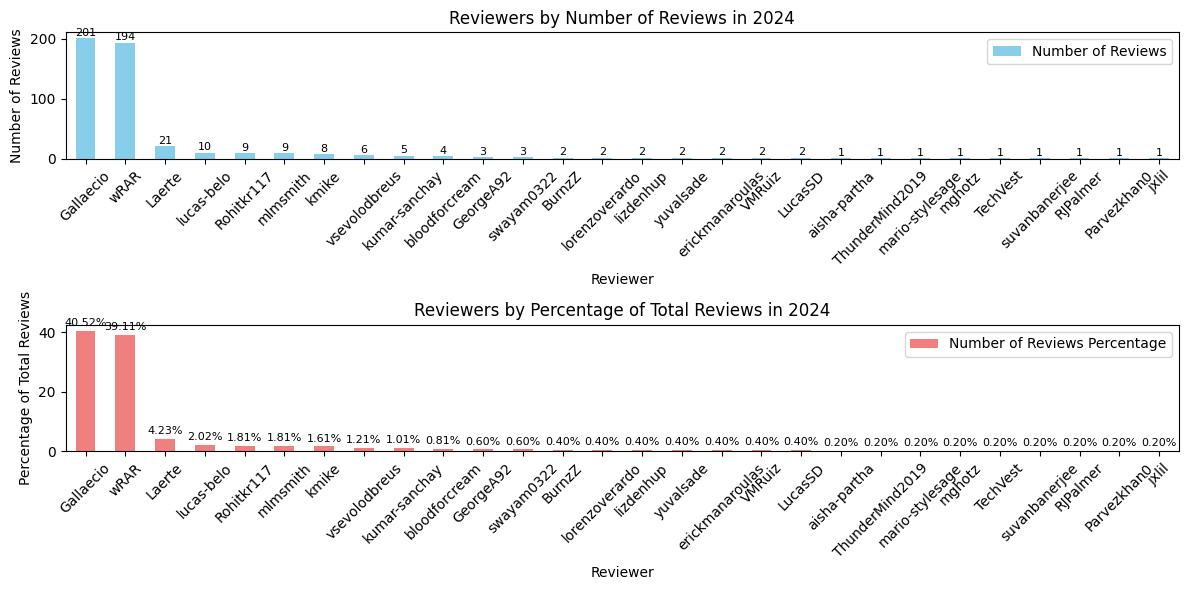

In [5]:
# NUMBER OF REVIEWS IN THE LAST YEAR (2024)
# ITS PERCENTAGE OF ALL REVIEWS HAPPENED IN THE LAST YEAR

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'scrapy_reviews.csv'
data = pd.read_csv(file_path)


# Extract the year from the `Submitted At` column
data['year'] = data['Submitted At'].str[:4]  # Get the first 4 characters as the year

# Filter data for the year 2024
data_2024 = data[data['year'] == '2024']

# Group by reviewer and count the occurrences for 2024
reviews_2024 = data_2024.groupby(['Reviewer']).size()

# Calculate the percentage of reviews in 2024
reviewsPer_2024 = (reviews_2024 / reviews_2024.sum() ) * 100

# Print the number of unique reviewers
num_reviewers_2024 = len(reviews_2024)
print(f"Number of unique reviewers in 2024: {num_reviewers_2024}")

# Print the total number of reviews in 2024
total_reviews_2024 = reviews_2024.sum()
print(f"Total number of reviews in 2024: {total_reviews_2024}")

# Make into a DataFrame
reviews_2024_df = pd.DataFrame ({'Number of Reviews': reviews_2024}).sort_values(by='Number of Reviews', ascending=False)
reviewsPer_2024_df = pd.DataFrame ({'Number of Reviews Percentage': reviewsPer_2024}).sort_values(by='Number of Reviews Percentage', ascending=False)

# Create subplots
fig, axes = plt.subplots(2,1, figsize=(12, 6))

# Plot 1: Total Reviews
reviews_2024_df.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Reviewers by Number of Reviews in 2024')
axes[0].set_xlabel('Reviewer')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=45)

# Annotate each bar
for i, value in enumerate(reviews_2024_df['Number of Reviews']):
    axes[0].text(
        i,  # x-coordinate
        value + 0.5,  # y-coordinate (slightly above the bar)
        f'{value}',  # formatted value
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=8  # font size
    )

# Plot 2: Percentage of Total Reviews
reviewsPer_2024_df.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Reviewers by Percentage of Total Reviews in 2024')
axes[1].set_xlabel('Reviewer')
axes[1].set_ylabel('Percentage of Total Reviews')
axes[1].tick_params(axis='x', rotation=45)

# Annotate each bar with the percentage value
for i, value in enumerate(reviewsPer_2024_df['Number of Reviews Percentage']):
    axes[1].text(
        i,  # x-coordinate
        (value + 1),  # y-coordinate (slightly above the bar)
        f'{value:.2f}%',  # formatted value
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=8  # font size
    )

# Show the plots
plt.tight_layout()
plt.show()

